# Terzan 9 

* Gaia DR3 filter
* Query results TOP 100k
* R ~ 10 arc min

In [93]:
!pip install astroquery
!pip install gaia
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# suppress warnings. Comment this out if you wish to see the warning messages
import pandas as pd
from math import log
from numpy import sqrt

import warnings
warnings.filterwarnings('ignore')

# Import Ter9 data from folder.

In [31]:
df = pd.read_csv ("1662662797548O-result.csv")
print (df)

# 1662662797548O-result.csv = Ter 9 raw data (already in the Clusters-L5 folder)

                source_id          ra        dec  parallax  parallax_error  \
0     4063221134446915328  270.525871 -26.916923 -0.028238        0.795876   
1     4063196429798485248  270.378396 -27.001885  0.464993        0.105109   
2     4063195712390684928  270.392274 -27.001084 -0.565724        1.805991   
3     4063195639351712128  270.412974 -27.004681  0.253053        0.278844   
4     4063195639351712256  270.414245 -27.004476  0.001813        0.106211   
...                   ...         ...        ...       ...             ...   
1995  4063228006396075648  270.594261 -26.805095       NaN             NaN   
1996  4063228006396075904  270.594654 -26.814029  0.316535        0.097832   
1997  4063228006396078336  270.586148 -26.807437  0.327804        0.108503   
1998  4063228006396082176  270.583871 -26.807840  0.524070        0.143648   
1999  4063228006396083584  270.586168 -26.810369 -0.051522        0.252414   

          pmra  pmra_error     pmdec  pmdec_error      ruwe  ..

# Import Ter9 data from Gaia database.

In [32]:
table_metadata = Gaia.load_table('gaiadr3.gaia_source')
table_metadata

# query for the star cluster Ter 9.

query_1 = '''SELECT TOP 100000 gaia_source.source_id,gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.parallax_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.ruwe,gaia_source.phot_g_mean_flux_over_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux_over_error,gaia_source.phot_rp_mean_flux_over_error,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.phot_variable_flag,gaia_source.non_single_star,gaia_source.has_xp_continuous,gaia_source.has_xp_sampled,gaia_source.has_rvs,gaia_source.has_epoch_photometry,gaia_source.has_epoch_rv,gaia_source.has_mcmc_gspphot,gaia_source.has_mcmc_msc,gaia_source.teff_gspphot,gaia_source.logg_gspphot,gaia_source.mh_gspphot,gaia_source.distance_gspphot,gaia_source.azero_gspphot,gaia_source.ag_gspphot,gaia_source.ebpminrp_gspphot
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(270.411667,-26.839722,.1550,-2.1210,-7.7630,29.3100,2000,2016.0)),
		COORD2(EPOCH_PROP_POS(270.411667,-26.839722,.1550,-2.1210,-7.7630,29.3100,2000,2016.0)),
		0.16666666666666666)
)=1'''

job1 = Gaia.launch_job(query_1)
print(job1)

results = job1.get_results()
results


# Converting astro.table to a df
df = pd.DataFrame(np.array(results))

Retrieving table 'gaiadr3.gaia_source'
<Table length=77680>
            name              dtype       unit                                                 description                                              n_bad
---------------------------- ------- ------------- ---------------------------------------------------------------------------------------------------- -----
                   source_id   int64                                                 Unique source identifier (unique within a particular Data Release)     0
                          ra float64           deg                                                                                      Right ascension     0
                         dec float64           deg                                                                                          Declination     0
                    parallax float64           mas                                                                                             Paralla

In [33]:
df.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ruwe,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,4063221134446915328,270.525871,-26.916923,-0.028238,0.795876,1.225141,0.794990,-1.743242,0.560973,1.384799,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4063196429798485248,270.378396,-27.001885,0.464993,0.105109,-0.274882,0.109427,-1.409826,0.078287,1.094465,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4063195712390684928,270.392274,-27.001084,-0.565724,1.805992,-3.017301,1.602150,-4.896952,0.954682,1.002845,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4063195639351712128,270.412974,-27.004681,0.253053,0.278844,-0.629069,0.332373,-3.051187,0.241056,1.057613,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4063195639351712256,270.414245,-27.004476,0.001813,0.106211,-7.045973,0.103914,-5.002316,0.074256,1.049119,...,False,True,True,5042.65332,3.0943,-0.1306,2219.186523,5.9847,4.0658,2.2621


# Data Manipulation

In [34]:
df.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ruwe',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag',
       'phot_bp_mean_flux_over_error', 'phot_rp_mean_flux_over_error', 'bp_rp',
       'radial_velocity', 'phot_variable_flag', 'non_single_star',
       'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot'],
      dtype='object')

In [35]:
df['mh_gspphot'].describe()

count    12721.000000
mean        -0.562194
std          0.786387
min         -4.090400
25%         -1.101500
50%         -0.643100
75%          0.096000
max          0.799800
Name: mh_gspphot, dtype: float64

In [36]:
df2 = df[['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ruwe',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag',
       'phot_bp_mean_flux_over_error', 'phot_rp_mean_flux_over_error', 'bp_rp',
       'radial_velocity', 'phot_variable_flag', 'non_single_star',
       'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot']]

In [37]:
df2 = df2.rename(columns = {'ra': 'RA', 'dec': 'DEC', 'parallax': 'Plx', 'parallax_error': 'e_Plx', 'pmra': 'pmRA', 'pmdec': 'pmDEC', 'pmra_error': 'e_pmRA', 'pmdec_error': 'e_pmDEC', 'phot_g_mean_mag': 'Gmag', 'bp_rp': 'BP-RP', 'phot_g_mean_flux_over_error': 'e_Gmag_flux', 'ebpminrp_gspphot': 'z', 'phot_bp_mean_flux_over_error': 'G_BPmag', 'phot_rp_mean_flux_over_error': 'G_RPmag'}) 

In [63]:
df2.columns
df3 = df2

In [64]:
df3 = df3.rename_axis('index_column').reset_index()
#TERZAN_9 = TERZAN_9.replace(np.nan, 'indef')

df3.head(5)

,index_column,source_id,RA,DEC,Plx,e_Plx,pmRA,e_pmRA,pmDEC,e_pmDEC,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,z
0,0,4063221134446915328,270.525871,-26.916923,-0.028238,0.795876,1.225141,0.794990,-1.743242,0.560973,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4063196429798485248,270.378396,-27.001885,0.464993,0.105109,-0.274882,0.109427,-1.409826,0.078287,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4063195712390684928,270.392274,-27.001084,-0.565724,1.805992,-3.017301,1.602150,-4.896952,0.954682,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4063195639351712128,270.412974,-27.004681,0.253053,0.278844,-0.629069,0.332373,-3.051187,0.241056,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4063195639351712256,270.414245,-27.004476,0.001813,0.106211,-7.045973,0.103914,-5.002316,0.074256,...,False,True,True,5042.65332,3.0943,-0.1306,2219.186523,5.9847,4.0658,2.2621


# Visualization of Ter 9.

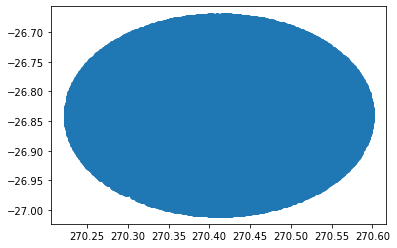

In [65]:
x = df3['RA']
y = df3['DEC']
plt.scatter(x,y)
plt.show()

# To calculate distance modulus.

In [66]:
p = df3['Plx'].mean()
p

0.21897480708261247

In [67]:
# Range of Parallax 
r1 = p+0.01
r2 = p-0.01

r1, r2

(0.22897480708261247, 0.20897480708261246)

In [68]:
d1 = np.round(1/(r1/200)*10,0)
d2 = np.round(1/(r2/200)*10,0)

d1, d2

(8735.0, 9571.0)

In [69]:
dm1 = (5*log(d1,10))-5
dm2 = (5*log(d2,10))-5

dm1, dm2

(14.706314546594747, 14.904786581148098)

In [70]:
df3.head

<bound method NDFrame.head of        index_column            source_id          RA        DEC       Plx  \
0                 0  4063221134446915328  270.525871 -26.916923 -0.028238   
1                 1  4063196429798485248  270.378396 -27.001885  0.464993   
2                 2  4063195712390684928  270.392274 -27.001084 -0.565724   
3                 3  4063195639351712128  270.412974 -27.004681  0.253053   
4                 4  4063195639351712256  270.414245 -27.004476  0.001813   
...             ...                  ...         ...        ...       ...   
77675         77675  4063947778390639104  270.307329 -26.903087  0.024792   
77676         77676  4063947778391734656  270.304364 -26.915238       NaN   
77677         77677  4063947778391734784  270.312379 -26.909416       NaN   
77678         77678  4063947778410020992  270.308561 -26.905847  0.402446   
77679         77679  4063947778411486976  270.297796 -26.912598       NaN   

          e_Plx      pmRA    e_pmRA     pmDEC

In [71]:
df3 = df3.drop(df3.columns[[0]], axis = 1)
df3.index.name = 'EDR3Name'

In [72]:
df3 = df3.dropna()
df3
df3['e_Gmag'] = 1/df3['e_Gmag_flux']
df3['1/rp'] = (1/df3['G_RPmag'])**2
df3['1/bp'] = (1/df3['G_BPmag'])**2
df3['e_BP-RP'] = sqrt (df3['1/rp'] + df3['1/bp'])

In [74]:
df3 = df3[['RA','DEC','Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'Gmag', 'e_Gmag', 'BP-RP', 'e_BP-RP']]

In [76]:
df3.head(10)

,RA,DEC,Plx,e_Plx,pmRA,e_pmRA,pmDEC,e_pmDEC,Gmag,e_Gmag,BP-RP,e_BP-RP
EDR3Name,,,,,,,,,,,,
203,270.397712,-27.002974,0.189075,0.041409,0.924686,0.041823,-0.829032,0.029771,15.414826,0.000505,3.100846,0.004933
214,270.395023,-26.987292,0.809553,0.025200,7.397032,0.024838,1.955283,0.017927,13.761327,0.000188,0.917574,0.001640
286,270.375185,-26.998883,0.156478,0.053625,-3.255010,0.055408,-3.753539,0.039035,15.998522,0.000896,3.518118,0.008290
532,270.385617,-26.991013,0.208452,0.056850,0.383892,0.059458,-3.149609,0.041850,15.950626,0.000696,3.501116,0.008883
860,270.335687,-26.986770,0.431634,0.039404,-0.424121,0.041074,0.159755,0.029676,15.343321,0.000578,2.681429,0.007182
913,270.327442,-26.985600,0.945601,0.031993,1.588447,0.032001,-5.661035,0.023767,14.580190,0.000375,0.990185,0.012989
920,270.327213,-26.984381,1.039616,0.026280,1.497679,0.023908,-5.885699,0.019210,12.746018,0.000229,0.794045,0.000869
1101,270.349020,-26.978630,12.074379,0.023433,-8.226647,0.023374,-102.191689,0.016617,8.669595,0.000209,0.826257,0.000680
1541,270.598244,-26.843380,0.310225,0.034406,0.658029,0.035784,-4.364376,0.025317,15.021680,0.000430,2.066802,0.006277


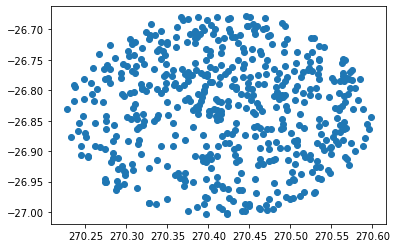

In [77]:
x = df3['RA']
y = df3['DEC']
plt.scatter(x,y)
plt.show()